# Sample code to get all of your own tweets via Twitter API
## Import twitter_api
You must create file named './twitter_api.py' and write auth information in it.

In [1]:
import twitter_api
# 認証情報を、別ファイルから取得
key          = twitter_api.CONSUMER_KEY
key_secret   = twitter_api.CONSUMER_SECRET_KEY
token        = twitter_api.ACCESS_TOKEN
token_secret = twitter_api.ACCESS_TOKEN_SECRET

## Define functions

In [2]:
def auth_twitter_api(key, key_secret, token, token_secret):
    import tweepy
    # 認証情報を設定
    auth = tweepy.OAuthHandler(key, key_secret)
    auth.set_access_token(token, token_secret)
    api = tweepy.API(auth)
    return api

def alltweets_to_csv(api):
    import csv
    # 全ツイートを入れる空のリストを用意
    all_tweets    = []
    # 直近の200ツイート分を取得しておく
    latest_tweets = api.user_timeline(count=200)
    all_tweets.extend(latest_tweets)

    # 取得するツイートがなくなるまで続ける
    while len(latest_tweets)>0:
        latest_tweets = api.user_timeline(count=200, max_id=all_tweets[-1].id-1)
        all_tweets.extend(latest_tweets)

    all_tweets_text = []
    with open('all_tweets.csv', 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['tweet_text', '#characters', '#favorited', '#retweeted', 'hasImage', 'hasBlogLink'])
        for tweet in all_tweets:
            if (tweet.text.startswith('RT')) or (tweet.text.startswith('@')):
                continue # RTとリプライはスキップ
            else:
                has_image        = 0 # 画像付きのツイートか
                has_bloglink     = 0 # ブログへのリンク付きのツイートか
                tweet_characters = tweet.text # ツイートの文字列
                if 'media' in tweet.entities:
                    has_image = 1
                if len(tweet.entities['urls']) > 0:
                    # urlは、文字数としてカウントしない
                    tweet_characters = tweet_characters.strip(tweet.entities['urls'][0]['url']).strip()
                    if 'nishipy.com' in tweet.entities['urls'][0]['display_url']:
                        has_bloglink   = 1
                all_tweets_text.append(tweet_characters)
                writer.writerow([tweet.text, len(tweet_characters), tweet.favorite_count, tweet.retweet_count, has_image, has_bloglink])
    return all_tweets_text

## Apply functions

In [3]:
api = auth_twitter_api(key=key, key_secret=key_secret, token=token, token_secret=token_secret)

In [4]:
all_tweets_text = alltweets_to_csv(api)

## Read the csv file

In [5]:
import pandas as pd
df = pd.read_csv('all_tweets.csv')
df[:25]

,tweet_text,#characters,#favorited,#retweeted,hasImage,hasBlogLink
0,LinkedIn経由でメールくれるのはいいけど、名字のスペル間違えるな。と思ったけど、自分で...,60,0,0,0,0
1,俺のラーメン https://t.co/jmxrWYuWY0,30,6,0,1,0
2,ほう│DeploymentとServiceをyamlファイルで定義する https://t....,35,0,0,0,0
3,kubernetesムズい,13,0,0,0,0
4,井原さんとネルシーニョが帰ってくるのか https://t.co/7TJIbpqn6v,19,0,0,0,0
5,菊池雄星世代としては、メジャーで活躍してほしい,23,2,0,0,0
6,komposeのこと調べたいのに、「もしかして:compose」と聞いてくるな,39,0,0,0,0
7,"komposeで""root level networks key - ignoring""みた...",56,0,0,0,0
8,贅沢言わないから、ボーナス100万くれ,19,5,0,0,0
9,先週Wantedly登録して、初めてメール来た。ビズリーチよりまともなやつ,37,3,0,0,0


## Visualize

In [6]:
# 可視化モジュール
#import matplotlib.pyplot as plt
#import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

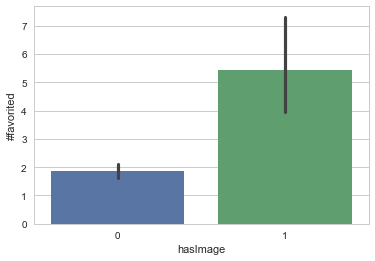

In [7]:
sns.barplot(x="hasImage", y="#favorited", data=df)

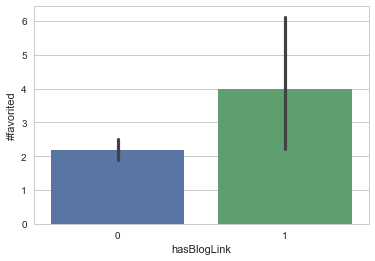

In [8]:
sns.barplot(x="hasBlogLink", y="#favorited", data=df)

In [9]:
df.describe()

,#characters,#favorited,#retweeted,hasImage,hasBlogLink
count,547.000000,547.000000,547.000000,547.000000,547.000000
mean,36.641682,2.252285,0.137112,0.111517,0.042048
std,23.797827,3.659296,0.587907,0.315060,0.200881
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.000000,0.000000,0.000000,0.000000
75%,49.500000,3.000000,0.000000,0.000000,0.000000
max,137.000000,48.000000,8.000000,1.000000,1.000000


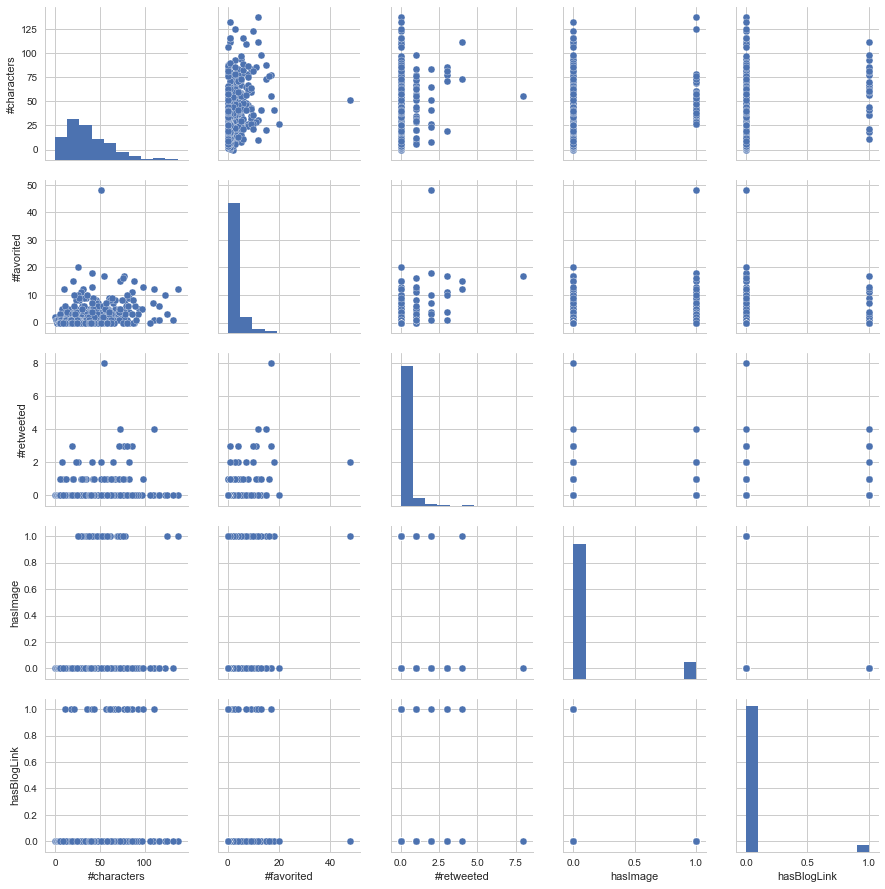

In [10]:
sns.pairplot(df)

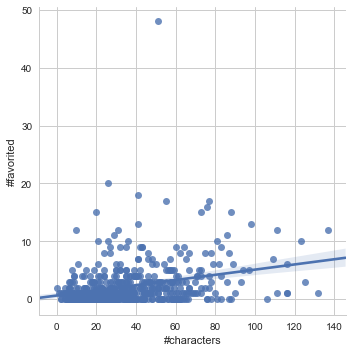

In [11]:
sns.lmplot(x="#characters",y="#favorited",data=df)